In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense , Bidirectional , LSTM
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [ ]:
data = pd.read_csv('/content/youtoxic_english_1000.csv')

In [ ]:
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [ ]:
new_data = data.drop(['CommentId' , 'VideoId'] , axis=1)
new_data.head(3)

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False


In [ ]:
text_list = np.array(new_data['Text'])
text_list

array(["If only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation.\xa0 To lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation.\xa0 The guy in this video is heavily emotional and hyped up and wants to be heard, and when he gets heard he just presses more and more.\xa0 He was never out to have a reasonable discussion.\xa0 Kudos to the Smerconish for keeping level the whole time and letting Masri make himself out to be a fool.\xa0 How dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate.\xa0 By the way, since when did police brutality become an epidemic?\xa0 I wish everyone would just stop pretending like they were there and they knew EXACTLY what was going on, because there's no measurable amount of people that honestl

In [ ]:
print(len(text_list))

1000


In [ ]:
max = 0
for item in text_list  :
  if len(item)> max :
    max = len(item)
print('the longest comment in the dataset is : '+ str(max) + " word" )

the longest comment in the dataset is : 4421 word


In [ ]:
new_data.isna().sum()

Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [ ]:
true_false = {True : 1 , False : 0}
data_ds = new_data.replace(true_false)
data_ds.head(3)

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
x_data = data_ds['Text']
y_data = data_ds.drop('Text' , axis=1)

In [ ]:
MAX_FEATURES = 200000

In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_FEATURES,
    output_sequence_length=1800,
    output_mode='int'
)

In [ ]:
x_data.values

array(["If only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation.\xa0 To lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation.\xa0 The guy in this video is heavily emotional and hyped up and wants to be heard, and when he gets heard he just presses more and more.\xa0 He was never out to have a reasonable discussion.\xa0 Kudos to the Smerconish for keeping level the whole time and letting Masri make himself out to be a fool.\xa0 How dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate.\xa0 By the way, since when did police brutality become an epidemic?\xa0 I wish everyone would just stop pretending like they were there and they knew EXACTLY what was going on, because there's no measurable amount of people that honestl

In [ ]:
vectorize_layer.adapt(x_data.values)

In [ ]:
vectorized_text = vectorize_layer(x_data.values)

In [ ]:
vectorized_text

<tf.Tensor: shape=(1000, 1800), dtype=int64, numpy=
array([[  26,   82,   18, ...,    0,    0,    0],
       [ 169,  447,    7, ...,    0,    0,    0],
       [  55,    9, 2944, ...,    0,    0,    0],
       ...,
       [   2, 1158,   64, ...,    0,    0,    0],
       [  12,   73,    7, ...,    0,    0,    0],
       [ 229,    2, 3333, ...,    0,    0,    0]])>

In [ ]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'and',
 'a',
 'of',
 'is',
 'that',
 'you',
 'in',
 'i',
 'this',
 'are',
 'it',
 'was',
 'they',
 'for',
 'people',
 'black',
 'not',
 'he',
 'have',
 'on',
 'be',
 'all',
 'if',
 'with',
 'police',
 'but',
 'what',
 'like',
 'just',
 'get',
 'his',
 'do',
 'white',
 'as',
 'so',
 'your',
 'no',
 'by',
 'about',
 'would',
 'there',
 'or',
 'at',
 'we',
 'them',
 'up',
 'who',
 'out',
 'their',
 'its',
 'brown',
 'dont',
 'an',
 'will',
 'when',
 'officer',
 'shot',
 'should',
 'because',
 'more',
 'from',
 'cop',
 'why',
 'how',
 'one',
 'these',
 'can',
 'my',
 'did',
 'video',
 'then',
 'him',
 'has',
 'some',
 'know',
 'me',
 'man',
 'being',
 'only',
 'cops',
 'over',
 'guy',
 'were',
 'had',
 '\xa0',
 'racist',
 'go',
 'fuck',
 'blacks',
 'time',
 'right',
 'need',
 'say',
 'race',
 'those',
 'down',
 'shit',
 'think',
 'off',
 'im',
 'been',
 'back',
 'see',
 'most',
 'make',
 'going',
 'even',
 'than',
 'here',
 'good',
 'still',
 'other',
 'nothi

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text , y_data.values))
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)

In [ ]:
## TRAIN TEST VALIDATION SPLIT
train_ds = dataset.take(int(len(dataset)*0.8))
val_ds = dataset.skip(int(len(dataset)*0.8)).take(int(len(dataset)*0.1))
test_ds = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [ ]:
print(len(train_ds)*16)### we multiply by batch size
print(len(val_ds)*16)
print(len(test_ds)*16)

800
96
96


In [ ]:
for item  in train_ds :
  print(item[0].shape)
  print(item[1].shape)
  break
for item  in val_ds :
  print(item[0].shape)
  print(item[1].shape)
  print(item)
  break

(16, 1800)
(16, 12)
(16, 1800)
(16, 12)
(<tf.Tensor: shape=(16, 1800), dtype=int64, numpy=
array([[ 380,    2, 3335, ...,    0,    0,    0],
       [4815,    3, 5037, ...,    0,    0,    0],
       [   2,   68,  372, ...,    0,    0,    0],
       ...,
       [ 239,  157,  311, ...,    0,    0,    0],
       [   2,  502,  351, ...,    0,    0,    0],
       [ 185,   12,    7, ...,    0,    0,    0]])>, <tf.Tensor: shape=(16, 12), dtype=int64, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
model = Sequential()
model.add(Embedding(MAX_FEATURES+1 , 32))
model.add(Bidirectional(LSTM(32 , activation="tanh")))
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 12)                1

In [ ]:
model.compile(
    optimizer =Adam() ,
    metrics = tf.keras.metrics.BinaryAccuracy(),
    loss =tf.keras.losses.BinaryCrossentropy()
)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
50/50 [==============================] - 76s 1s/step - loss: 0.2043 - binary_accuracy: 0.9186 - val_loss: 0.3147 - val_binary_accuracy: 0.8976
Epoch 2/10
50/50 [==============================] - 74s 1s/step - loss: 0.1607 - binary_accuracy: 0.9361 - val_loss: 0.2471 - val_binary_accuracy: 0.9280
Epoch 3/10
50/50 [==============================] - 75s 1s/step - loss: 0.1163 - binary_accuracy: 0.9558 - val_loss: 0.2029 - val_binary_accuracy: 0.9531
Epoch 4/10
50/50 [==============================] - 73s 1s/step - loss: 0.0844 - binary_accuracy: 0.9703 - val_loss: 0.1205 - val_binary_accuracy: 0.9644
Epoch 5/10
50/50 [==============================] - 74s 1s/step - loss: 0.0638 - binary_accuracy: 0.9779 - val_loss: 0.0932 - val_binary_accuracy: 0.9688
Epoch 6/10
50/50 [==============================] - 73s 1s/step - loss: 0.0468 - binary_accuracy: 0.9849 - val_loss: 0.0703 - val_binary_accuracy: 0.9774
Epoch 7/10
50/50 [==============================] - 74s 1s/step - loss: 0.03

<Figure size 800x500 with 0 Axes>

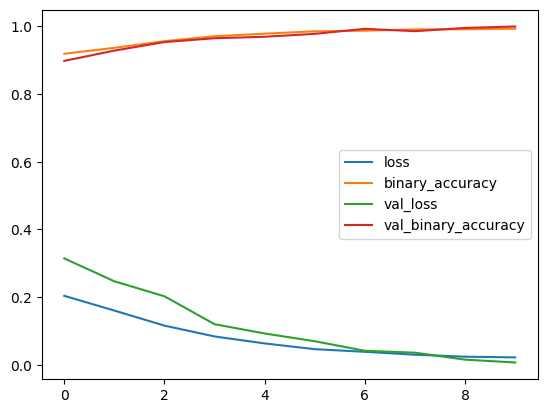

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
input_text = vectorize_layer('You freaking suck! I am going to hit you.')

In [ ]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   9, 1820, 1117, ...,    0,    0,    0])>

In [ ]:
res = model.predict(np.expand_dims(input_text ,axis=0))
print(res)

1/1 [==============================] - 0s 120ms/step
[[9.9968797e-01 9.9984396e-01 2.2636155e-02 7.5114042e-01 2.0453113e-01
  7.0777831e-05 3.2413041e-04 9.9159361e-06 4.3576543e-05 2.1065468e-06
  3.3172822e-05 4.0807863e-06]]


In [ ]:
predection = (res > 0.5).astype(int)

In [ ]:
predection

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
batch_x , batch_y = test_ds.as_numpy_iterator().next()
batch_x

array([[ 116,   63, 1773, ...,    0,    0,    0],
       [   8, 3362,   15, ...,    0,    0,    0],
       [  35,   18,   20, ...,    0,    0,    0],
       ...,
       [  12,  340,   61, ...,    0,    0,    0],
       [  53,   25,   62, ...,    0,    0,    0],
       [  94,   23, 4231, ...,    0,    0,    0]])

In [ ]:
batch_y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 0s 188ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
from tensorflow.keras.metrics import Precision , Recall , Accuracy

In [ ]:
model.save('YoutyoupRecomondation.h5')

In [ ]:
pre = Precision()
re = Recall()

In [ ]:
for batch in test_ds.as_numpy_iterator() :
  x_test , y_true = batch
  y_hat = model.predict(x_test)
  y_true = y_true.flatten()
  y_hat = y_hat.flatten()
  pre.update_state(y_true , y_hat)
  re.update_state(y_true , y_hat)

1/1 [==============================] - 0s 181ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}')

Precision: 1.0, Recall:0.9642857313156128


In [ ]:
predection

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
classes = np.array(list(new_data.columns[1:]))

In [ ]:
classes

array(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'], dtype='<U15')

In [ ]:
indexes = np.in1d(predection[0] , [1]).nonzero()[0]
print(indexes)

[0 1 3]


In [ ]:
print(f"this comontaire is {' and '.join(list(classes[indexes])) }")

tis comontaire is IsToxic and IsAbusive and IsProvocative


In [ ]:
def pridect(text) :
  classes = np.array(list(new_data.columns[1:]))
  vector= vectorize_layer(text)
  predection = model.predict(np.expand_dims(vector, axis=0))
  indexes = np.in1d(predection[0] , [1]).nonzero()[0]
  print(f"this comontaire is {' and '.join(list(classes[indexes])) }")